<a href="https://colab.research.google.com/github/coder-harshil/global-terrorism-analysis/blob/main/Capstone_Project_EDA_Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

##**Terrorism has been a global problem for decades now, and with recent misfortune in Afghanistan, it is high time that we shade light on how the attacks have happened over the years. Thanks to the assignment, we have data of more than 180,000 attacks that happened during 1970-2017.**

## **Here is a list of operations I will be performing in this colab notebook to analyse the dataset -**

## **1. Cleaning the data and keeping only required columns (there are 135 columns in the dataset, and I will select only the necessary ones).**

## **2. Replacing null values when and where necessary for smooth data analysis.**

## **3. Filtering dataset and creating other dataframes for diving deep into how particular factors influence the data.**

## **4. Creating basic visualizations to understand the convery the effect of factors.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing and reading the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Global Terrorism Data.csv', encoding = 'latin1' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### **As the data contains many unnecessary columns, we will first filter and select only the essential ones for our analysis**

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
#Will use only the essential columns for the analysis of the data

columns_required = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill']
terror_df = pd.DataFrame(columns = columns_required, data = df)

In [7]:
terror_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [8]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   gname            181691 non-null  object 
 10  weaptype1_txt    181691 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 16.6+ MB


In [9]:
#Eliminating null values from 'nkill' column and replacing them by median values

terror_df.loc[terror_df['nkill'].isna(), 'nkill'] = terror_df.loc[~terror_df['nkill'].isna(), 'nkill'].median()

In [10]:
#Checking dataframe information again to ensure null values are filled

terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   gname            181691 non-null  object 
 10  weaptype1_txt    181691 non-null  object 
 11  nkill            181691 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 16.6+ MB


In [11]:
terror_df.describe()

,iyear,imonth,iday,nkill
count,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860
std,13.259430,3.388303,8.814045,11.227057
min,1970.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000


In [ ]:
#Saving CSV in system for creating better visuals with Tableau

terror_df.to_excel("/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/terror.xlsx")

#### **1. Now that we have got our data sorted, it is time to begin with regions that have faced most terror attacks. This will be achieved by grouping the data according to region. We will also analyse the top-20 countries according to number of attacks on them.**

In [12]:
#Making a new dataframe grouped by region

top_affected_region = terror_df['region_txt'].value_counts().reset_index()
top_affected_region.columns = ['region','attacks']
top_affected_region

,region,attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


<BarContainer object of 12 artists>

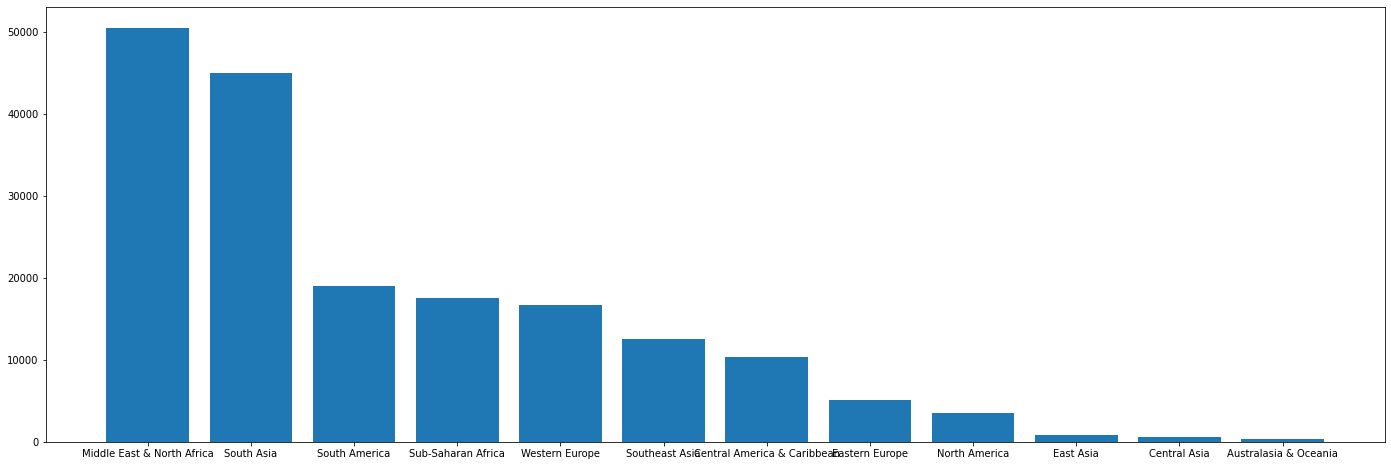

In [13]:
#Plotting regions vs number of attacks faced

fig = plt.figure(figsize =(24,8))
plt.bar(top_affected_region['region'], top_affected_region['attacks'])

In [14]:
#Making a new dataframe grouped by countries

country_wise_terrorism = terror_df['country_txt'].value_counts().reset_index()
top_20_countries = country_wise_terrorism.head(20)
top_20_countries.columns = ['country','number_of_attacks']

<BarContainer object of 20 artists>

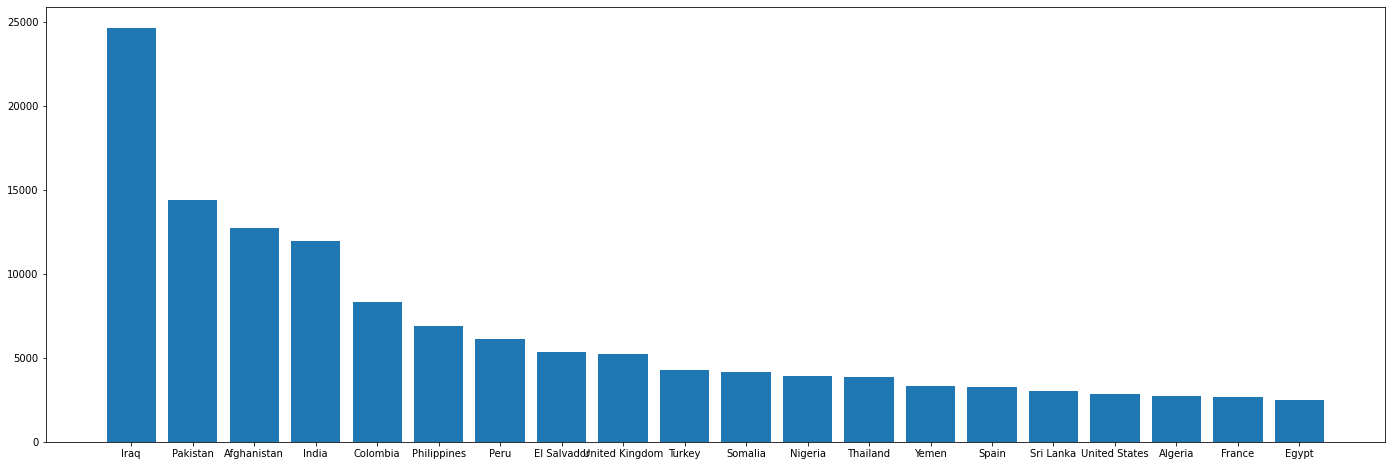

In [15]:
#Plotting countries vs number of attacks faced

fig = plt.figure(figsize =(24,8))
plt.bar(top_20_countries['country'], top_20_countries['number_of_attacks'])

As seen, most cases are from Middle East and Northern Africa primarily due to Iraq being a huge outlier in terms of the number of attacks faced. If we remove Iraq from the dataset, Middle East might not look actually bad.

However, same is not the case with South Asia where Pakistan, Afghanistan, and India have all faced massive number of terror attacks over the years.

**Concluding the first phase - While Middle East and North Africa look more dangerous due to Iraq, as a region overall - South Asia is in more danger of facing terror attacks.**

### **2. Now we are going to have a look at how the number of terror attacks have changed over the years and if there is a specific time of year that has faced drastically more terror attacks than other months**

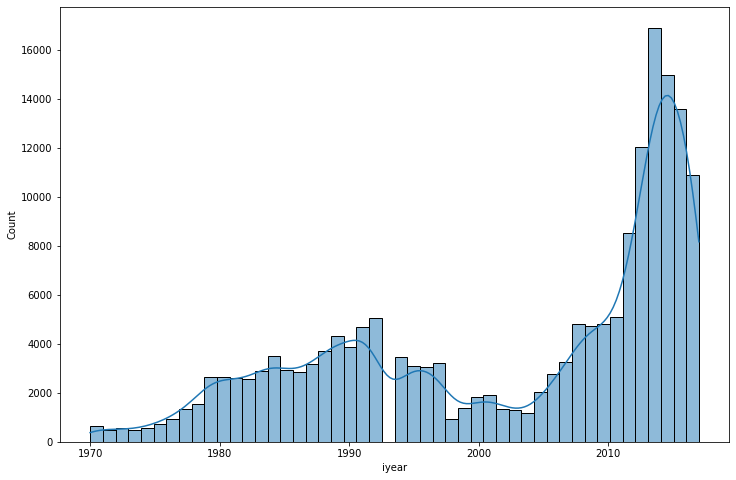

In [16]:
#Has terrorism seen a sharp rise or fall in the recent years?

fig = plt.figure(figsize =(12,8))
sns.histplot(terror_df, x = 'iyear', bins = 48, kde = True)

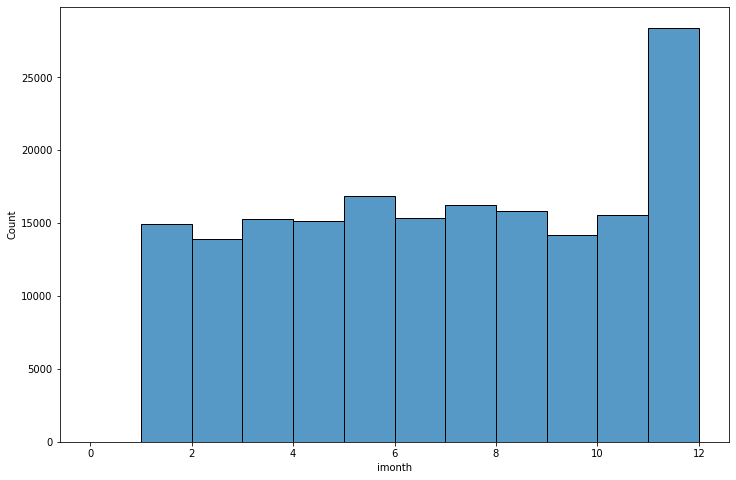

In [17]:
#What time of the year is prone to terror attacks the most

fig = plt.figure(figsize =(12,8))
sns.histplot(terror_df, x = 'imonth', bins = 12)

***Winter is coming***, is more than just a TV series phrase going by the analysis of this dataset. Most terror attacks happened in December, in Middle East and Asia, showing how terror groups are more active when the winter sets in? Do we have data of why this happens? No. 

**But what it does tell us is the time when a country's forces can be more alert in order to reduce the losses.**

### **3. Now that we know about what places and what years have suffered terror attacks, it is time to dive deeper and analyze which regions and countries had most casualities.**

In [18]:
#Analyzing casualties by regions

casualties_df = terror_df.groupby('region_txt')['nkill'].sum().reset_index()
casualties_df = casualties_df.sort_values(by = 'nkill', ascending = False)
casualties_df.columns = ['region', 'nkill']

In [19]:
casualties_df

,region,nkill
5,Middle East & North Africa,137642.0
8,South Asia,101319.0
10,Sub-Saharan Africa,78386.0
7,South America,28849.0
1,Central America & Caribbean,28708.0
9,Southeast Asia,15637.0
4,Eastern Europe,7415.0
11,Western Europe,6694.0
6,North America,4916.0
3,East Asia,1152.0


In [20]:
#Analyzing by countries

country_casualties = terror_df.groupby('country_txt')['nkill'].sum().reset_index()
country_casualties.columns = ['country','nkill']
country_casualties = country_casualties.sort_values(by = 'nkill', ascending = False)

In [21]:
country_casualties.head()

,country,nkill
84,Iraq,78589.0
0,Afghanistan,39384.0
134,Pakistan,23822.0
130,Nigeria,22682.0
80,India,19341.0


Middle East and North Africa lost most lives due to terror attacks with Iraq leading the table once again when it comes to countries.

In [22]:
#Regions and Countries with highest casualties per attack ratio - 

worst_affected_regions = pd.merge(casualties_df,top_affected_region, on = 'region')
worst_affected_regions['casualties_ratio'] = worst_affected_regions['nkill']/worst_affected_regions['attacks']
worst_affected_regions = worst_affected_regions.sort_values(by = 'casualties_ratio', ascending = False)

In [23]:
worst_affected_regions

,region,nkill,attacks,casualties_ratio
2,Sub-Saharan Africa,78386.0,17550,4.466439
4,Central America & Caribbean,28708.0,10344,2.775329
0,Middle East & North Africa,137642.0,50474,2.726988
1,South Asia,101319.0,44974,2.252835
10,Central Asia,1000.0,563,1.776199
3,South America,28849.0,18978,1.520129
6,Eastern Europe,7415.0,5144,1.441485
9,East Asia,1152.0,802,1.436409
8,North America,4916.0,3456,1.422454
5,Southeast Asia,15637.0,12485,1.252463


However, when it comes to lost lives per terror attack, Sub-Saharan Africa is way ahead of any other region, meaning that if attacks were to happen more frequently, they will suffer the worst. This region needs to increase security drastically because even the second worst region in terms of casualties ratio is far less.

In [24]:
#Doing same analysis for countries

worst_affected_countries = pd.merge(country_casualties.head(20), top_20_countries, on = 'country')
worst_affected_countries['casualties_ratio'] = worst_affected_countries['nkill']/worst_affected_countries['number_of_attacks']
worst_affected_countries = worst_affected_countries.sort_values(by = 'casualties_ratio', ascending = False)

In [25]:
worst_affected_countries

,country,nkill,number_of_attacks,casualties_ratio
3,Nigeria,22682.0,3907,5.805477
5,Sri Lanka,15530.0,3022,5.138981
9,Algeria,11066.0,2743,4.034269
0,Iraq,78589.0,24636,3.190006
1,Afghanistan,39384.0,12731,3.093551
12,Yemen,8776.0,3347,2.622050
10,Somalia,10273.0,4142,2.480203
8,El Salvador,12053.0,5320,2.265602
7,Peru,12771.0,6096,2.094980
6,Colombia,14698.0,8306,1.769564


Analyzing countries, the top 4 nations suffering from terror attacks have far worse casualty/attack ratio than any other place in the list. Nigeria and Iraq specially seem to be having worst of both the worlds as they not only feature in top-5 when it comes to facing number of attacks, but also losing most lives per attack.

Statistically, they are the most dangerous countries according to the dataset.

## **4. Having gone through timing and worldwide influence of terror attacks, we take a look at even bigger perspective - who are the major preparators and in what forms do these attacks happen? Like how common are Bombing Explosion attacks in contrast to Kidnapping or Hijack ones?**

In [26]:
#Type of attacks that caused most casualties

type_of_attacks = terror_df.groupby(['attacktype1_txt'])['nkill'].sum().reset_index()
type_of_attacks.columns = ['attack_type', 'casualties']
type_of_attacks = type_of_attacks.sort_values(by = 'casualties', ascending = False)
type_of_attacks

,attack_type,casualties
0,Armed Assault,160297.0
2,Bombing/Explosion,157321.0
8,Unknown,32381.0
1,Assassination,24920.0
6,Hostage Taking (Kidnapping),24231.0
5,Hostage Taking (Barricade Incident),4478.0
4,Hijacking,3718.0
3,Facility/Infrastructure Attack,3642.0
7,Unarmed Assault,880.0


<BarContainer object of 9 artists>

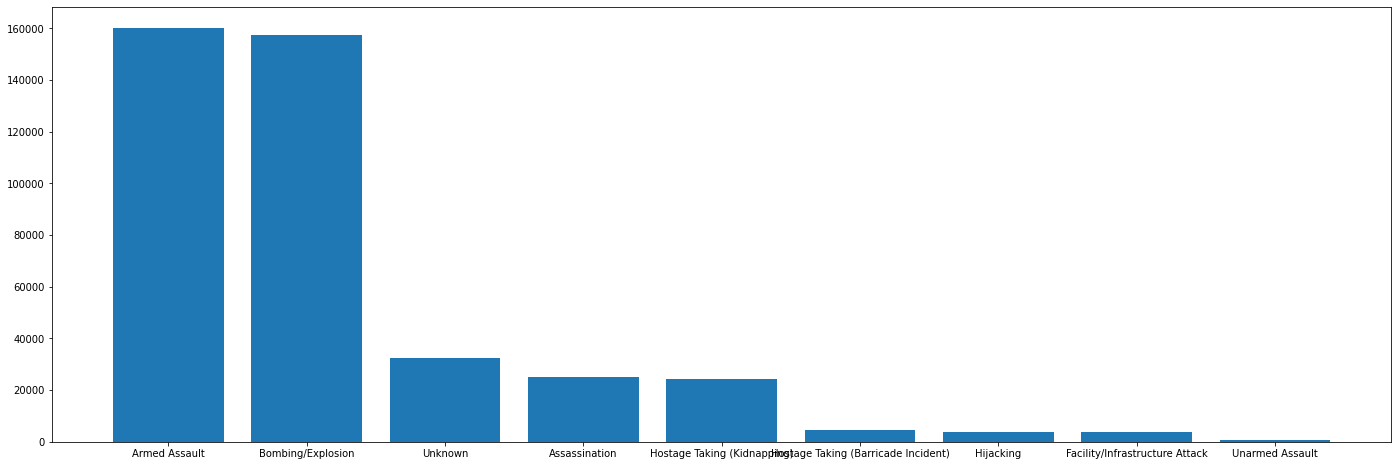

In [27]:
fig = plt.figure(figsize =(24,8))
plt.bar(type_of_attacks['attack_type'], type_of_attacks['casualties'])

Unexpectedly, Armed Assaults are the main matter of concern followed by Bombing/Explosion. While the latter take most attention, it should be noted that former is an equally responsible reason for high casulaties if not more!

Now, time to find out the major forces responsible for these attacks!

In [28]:
#Counting the number of attacks undertaken grouped by group names

group_count = terror_df['gname'].value_counts().reset_index()
group_count.columns = ['group', 'attack_count']
group_count = group_count.head(20)

In [29]:
major_groups = terror_df.groupby(['gname'])['nkill'].sum().reset_index()
major_groups.columns = ['group','casualties']
major_groups = major_groups.sort_values(by = 'casualties', ascending = False)
major_groups = major_groups.head(20)

In [30]:
#Worst terror groups by casualties/attack ratio

worst_terror_groups = pd.merge(major_groups, group_count, how = 'inner', on = 'group')
worst_terror_groups['casualty_ratio'] = worst_terror_groups['casualties']/worst_terror_groups['attack_count']
worst_terror_groups = worst_terror_groups.sort_values(by = 'casualty_ratio', ascending = False)
worst_terror_groups = worst_terror_groups.drop(0, axis = 0)
worst_terror_groups

,group,casualties,attack_count,casualty_ratio
3,Boko Haram,20328.0,2418,8.406948
1,Islamic State of Iraq and the Levant (ISIL),38923.0,5613,6.934438
5,Liberation Tigers of Tamil Eelam (LTTE),10989.0,1606,6.842466
8,Tehrik-i-Taliban Pakistan (TTP),6042.0,1351,4.472243
2,Taliban,29410.0,7478,3.932870
12,Al-Qaida in the Arabian Peninsula (AQAP),3565.0,1020,3.495098
13,Houthi extremists (Ansar Allah),3050.0,1062,2.871940
6,Al-Shabaab,9330.0,3288,2.837591
4,Shining Path (SL),11601.0,4555,2.546872
7,Farabundo Marti National Liberation Front (FMLN),8065.0,3351,2.406744


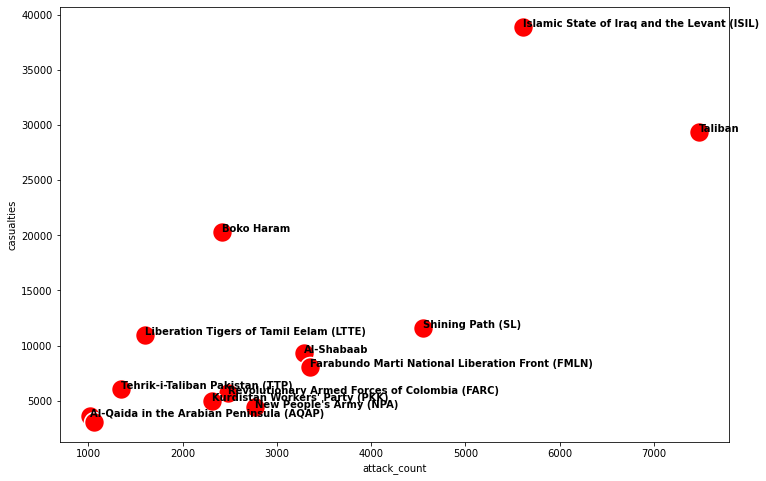

In [31]:
fig = plt.figure(figsize = (12,8))

sns.scatterplot(data = worst_terror_groups, x = 'attack_count', y = 'casualties', s = 400, color = 'red')
for line in range(1,worst_terror_groups.shape[0]):
  plt.text(worst_terror_groups['attack_count'][line]+0.2, worst_terror_groups['casualties'][line], worst_terror_groups['group'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

As seen from the scatter plot, ISIL and Taliban are the groups responsible for most casualties and attacks. Shining Path, Boko Haram, Al-Shabaab are other groups that undertake most of the attacks. Also, it should be noted that while many terrorist groups have slowed down over the time, Taliban and ISIL remain threats even till this day.

## **5. Now that we have dealt with geography, time, type of attacks, and forces responsible behind them. It is time to shade some light on victims. Who are the primary victims of these terror groups, and what group is more prone to losing their lives as compared to the others?**

In [32]:
#Grouping by Victims

victim_by_attacks = terror_df['targtype1_txt'].value_counts().reset_index()
victim_by_attacks.columns = ['victims', 'number_of_attacks']
victim_by_attacks

,victims,number_of_attacks
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


In [33]:
victims_df = terror_df.groupby('targtype1_txt')['nkill'].sum().reset_index()
victims_df.columns = ['victims', 'casualties']
victims_df = victims_df.sort_values(by = 'casualties', ascending = False)
victims_df

,victims,casualties
13,Private Citizens & Property,140504.0
9,Military,106047.0
12,Police,53704.0
6,Government (General),26071.0
2,Business,23487.0
18,Transportation,13916.0
14,Religious Figures/Institutions,13413.0
16,Terrorists/Non-State Militia,9088.0
19,Unknown,4329.0
1,Airports & Aircraft,3767.0


In [34]:
worst_affected_victims = pd.merge(victims_df,victim_by_attacks, on = 'victims')
worst_affected_victims['casualty_ratio'] = worst_affected_victims['casualties']/worst_affected_victims['number_of_attacks']
worst_affected_victims = worst_affected_victims.sort_values(by = 'casualty_ratio', ascending = False)
worst_affected_victims

,victims,casualties,number_of_attacks,casualty_ratio
1,Military,106047.0,27984,3.789558
15,Maritime,1191.0,351,3.393162
0,Private Citizens & Property,140504.0,43511,3.229160
6,Religious Figures/Institutions,13413.0,4440,3.020946
7,Terrorists/Non-State Militia,9088.0,3039,2.990457
9,Airports & Aircraft,3767.0,1343,2.804914
2,Police,53704.0,24506,2.191463
5,Transportation,13916.0,6799,2.046772
11,Violent Political Party,3617.0,1866,1.938371
19,Other,255.0,137,1.861314


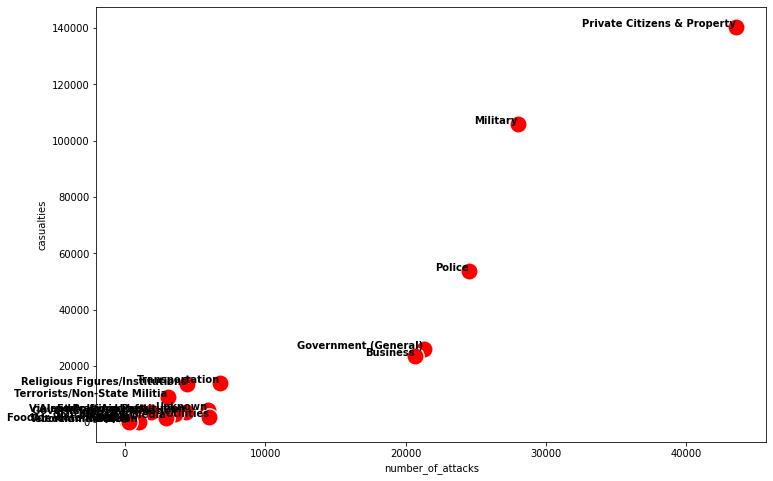

In [35]:
fig = plt.figure(figsize = (12,8))

sns.scatterplot(data = worst_affected_victims, x = 'number_of_attacks', y = 'casualties', s = 300, color = 'red')
for line in range(0,worst_affected_victims.shape[0]):
  plt.text(worst_affected_victims['number_of_attacks'][line]+0.2, worst_affected_victims['casualties'][line], worst_affected_victims['victims'][line], horizontalalignment='right', size='medium', color='black', weight='semibold')
plt.show()

To sum the victim analysis - Private Properties and Citizens remain at the largest risk of suffering loss due to terror attacks, followed by Military and Police forces.

## **Conclusion**

The overall conclusions from the Global Terrorism dataset present some hope as well as some negatives. While the crime rate has been falling in late years, some countries in South Asia are yet to show a significant improvement. Some significant takeaways from Exploratory Data Analysis of this Global Terrorism Data:

1. Middle East and North Africa may feel like most affected regions due to outlier in form of Iraq, but South Asian region has more countries affected by terrorism, including the likes of Pakistan, Afghanistan, and India.

2. Terrorism reached its peak in 2014, and has seen quite some decline since then. However, across all the years, the worrying trend that remains common is - attacks in December. The last month of the year, for some reason is the worst time world has to face when it comes to terrorism. Therefore, governments all over the world to ensure extra safety during this time period.

3. While Taliban are responsible for most attacks around the globe, ISIL have most blood on their hands. Another terror group that has wreaked havoc is Boko Haram, a group with major influence in Nigeria. All these three groups are not only responsible for plethora of attacks and over the top casualties, but they are also found to be worst killers as they average most casualties with each attack.

4. Another mind-blogging observation from dataset was how most casualties happen. While Bombing/Explosion remains the most common form of terror attack (nearly half the terror attacks are Bombing/Explosion), shockingly, it is the Armed Assault that is responsible for most casualties. So, a less popular form of attack causes more casualties and that is something authorities need to keep an eye on if they want to bring down unwanted numbers.

5. As they say, the worst consequences of wars are suffered by none other than laymen of the land. Of all the terror attacks recorded over the years, Private Properties and Citizens were by far the biggest victims followed by Military Personnel. 

To sum it up, analysis of Terrorism across the globe brought many different factors upon analyzing, and we can only hope that these insights may help authorities understand the situations better and implement measures accordingly.